Name: Abhishek Ghodse

Exploratory Data Analysis on Dataset - Terrorism

Import Libraries

In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the data

In [347]:
data=pd.read_csv("globalterrorismdb_0718dist.csv", encoding="latin1")

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [348]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [349]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [350]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [351]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [352]:
data.shape

(181691, 135)

In [353]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [354]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

Cleaning the data

In [355]:
data=data[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]

In [356]:
data.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [357]:
data.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)
data.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [358]:
data.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 434
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed             10313
Wounded            16311
Add Notes         153402
dtype: int64

In [359]:
data.shape

(181691, 19)

In [360]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   Province/State  181270 non-null  object 
 6   City            181257 non-null  object 
 7   Latitude        177135 non-null  float64
 8   Longitude       177134 non-null  float64
 9   Location        55495 non-null   object 
 10  Summary         115562 non-null  object 
 11  Attack Type     181691 non-null  object 
 12  Target Type     181691 non-null  object 
 13  Group Name      181691 non-null  object 
 14  Motive          50561 non-null   object 
 15  Weapon Type     181691 non-null  object 
 16  Killed          171378 non-null  float64
 17  Wounded   

In [361]:
data["Killed"]=data["Killed"].fillna(0)
data["Wounded"]=data["Wounded"].fillna(0)
data["Casualty"]=data["Killed"]+data["Wounded"]

In [362]:
data.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


 Exploratory Data Analysis

Year wise Attacks

In [363]:
#Number of Attacks in each Year
attacks=data["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(
    columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581
1975,740
1976,923
1977,1319
1978,1526


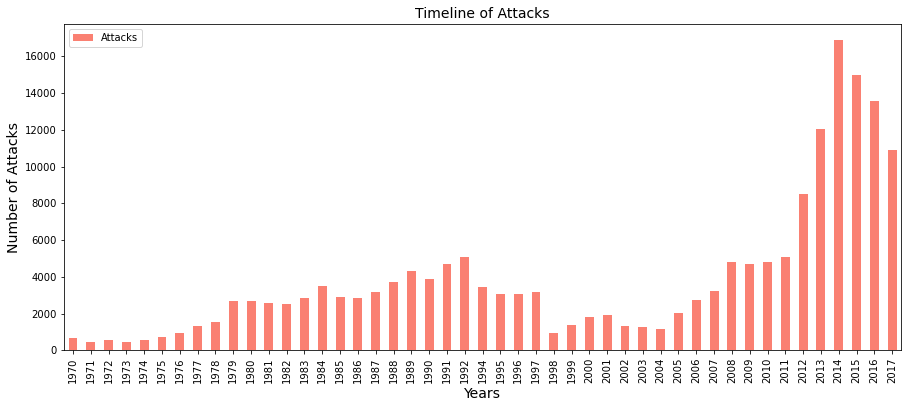

In [364]:
attacks.plot(kind="bar",color="salmon",figsize=(15,6))
plt.title("Timeline of Attacks",fontsize=14)
plt.xlabel("Years",fontsize=14)
plt.ylabel("Number of Attacks",fontsize=14)
plt.show()

In [365]:
#Total Casualties (Killed + Wounded) in each Year
yc=data[["Year","Casualty"]].groupby("Year").sum()
yc

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0
1975,1234.0
1976,1430.0
1977,974.0
1978,3059.0


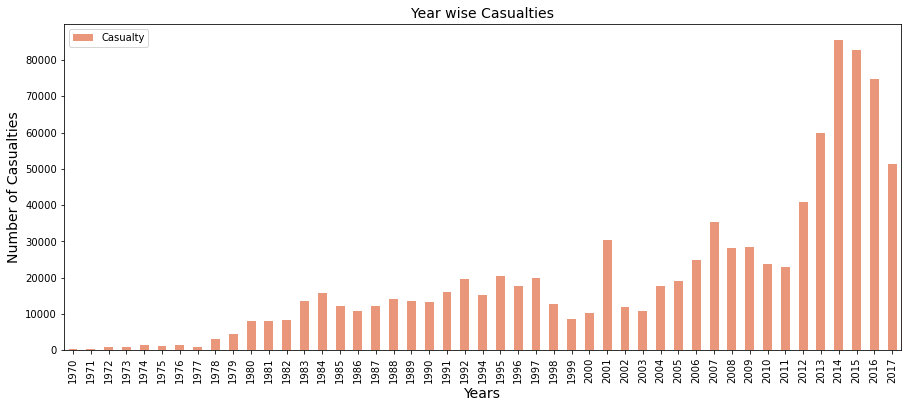

In [366]:
yc.plot(kind="bar",color="darksalmon",figsize=(15,6))
plt.title("Year wise Casualties",fontsize=14)
plt.xlabel("Years",fontsize=14)
plt.ylabel("Number of Casualties",fontsize=14)
plt.show()

In [367]:
#Killed in each Year
yk=data[["Year","Killed"]].groupby("Year").sum()
yk

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0
1975,617.0
1976,674.0
1977,456.0
1978,1459.0


In [368]:
#Wounded in each Year
yw=data[["Year","Wounded"]].groupby("Year").sum()
yw

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0
1975,617.0
1976,756.0
1977,518.0
1978,1600.0


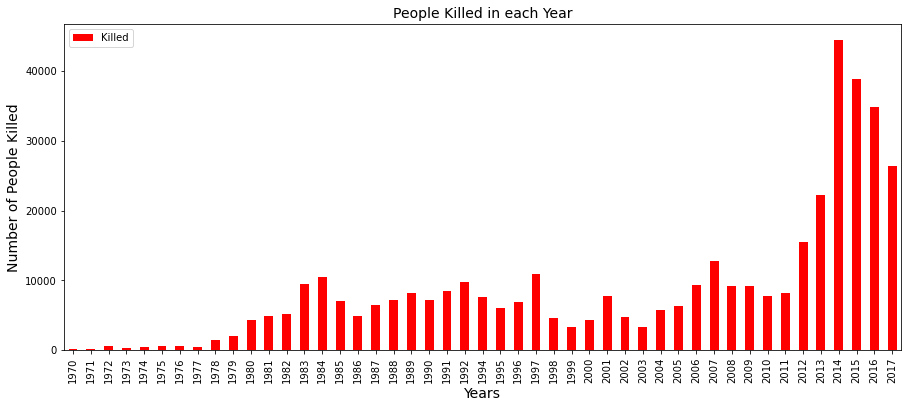

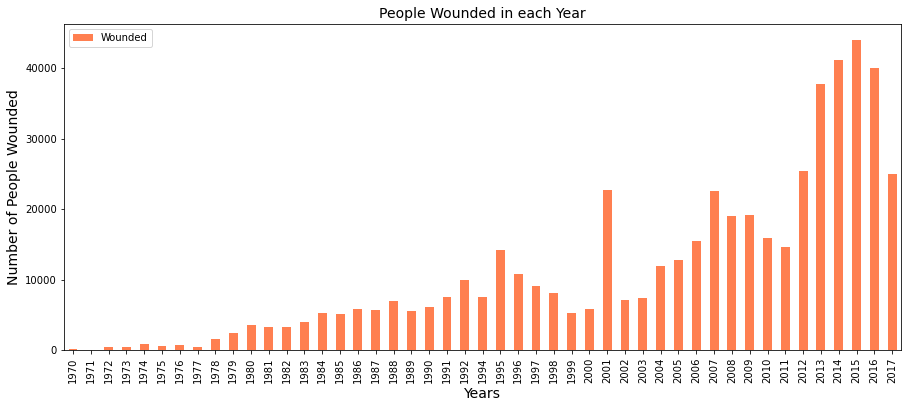

In [369]:
#Killed in each Year
yk.plot(kind="bar",color="red",figsize=(15,6))
plt.title("People Killed in each Year",fontsize=14)
plt.xlabel("Years",fontsize=14)
plt.ylabel("Number of People Killed",fontsize=14)

#Wounded in each Year
yw.plot(kind="bar",color="coral",figsize=(15,6))
plt.title("People Wounded in each Year",fontsize=14)
plt.xlabel("Years",fontsize=14)
plt.ylabel("Number of People Wounded",fontsize=14)

plt.show()

Region wise Attacks

In [370]:
#Terrorist Attacks over Regions from 1970-2017
reg=data["Region"].value_counts()
reg

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

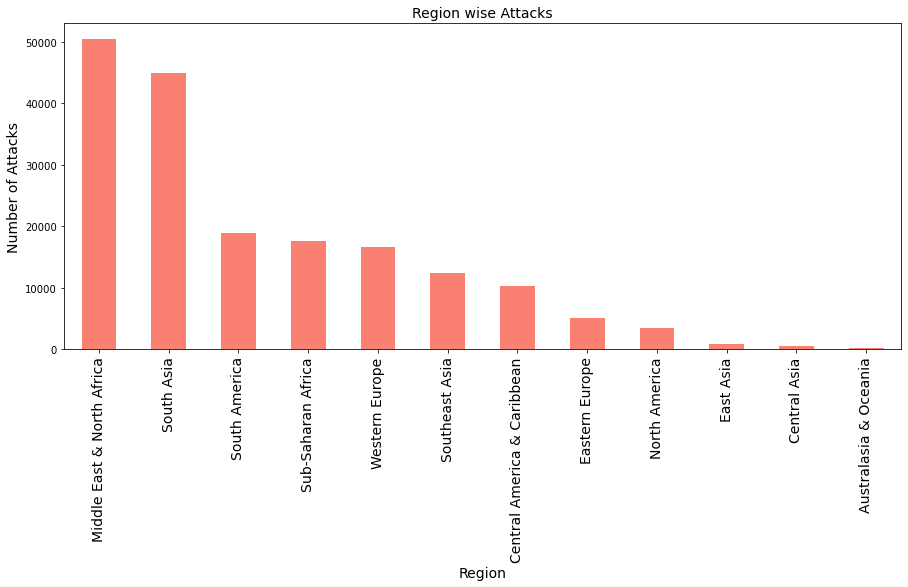

In [371]:
reg.plot(kind="bar",color="salmon",figsize=(15,6))
plt.title("Region wise Attacks",fontsize=14)
plt.xlabel("Region",fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Number of Attacks",fontsize=14)
plt.show()

In [372]:
#Total Casualties (Killed + Wounded) in each Region
rc=data[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc

,Casualty
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


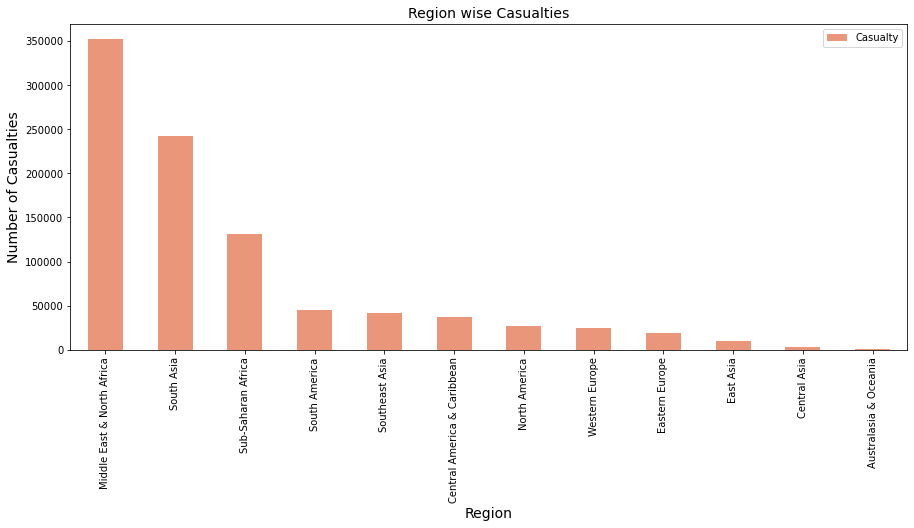

In [373]:
rc.plot(kind="bar",color="darksalmon",figsize=(15,6))
plt.title("Region wise Casualties",fontsize=14)
plt.xlabel("Region",fontsize=14)
plt.ylabel("Number of Casualties",fontsize=14)
plt.show()

In [374]:
#Killed in each Region
rk=data[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
rk

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


In [375]:
#Wounded in each Region
rw=data[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rw

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


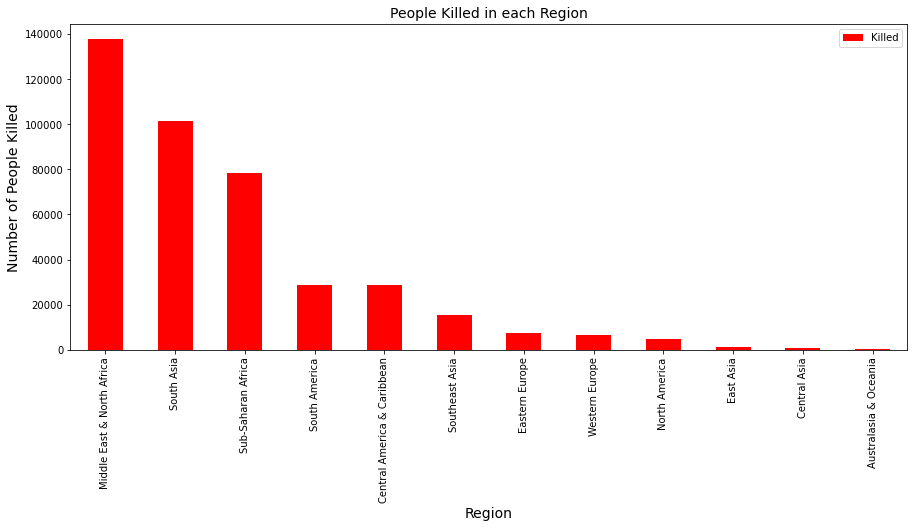

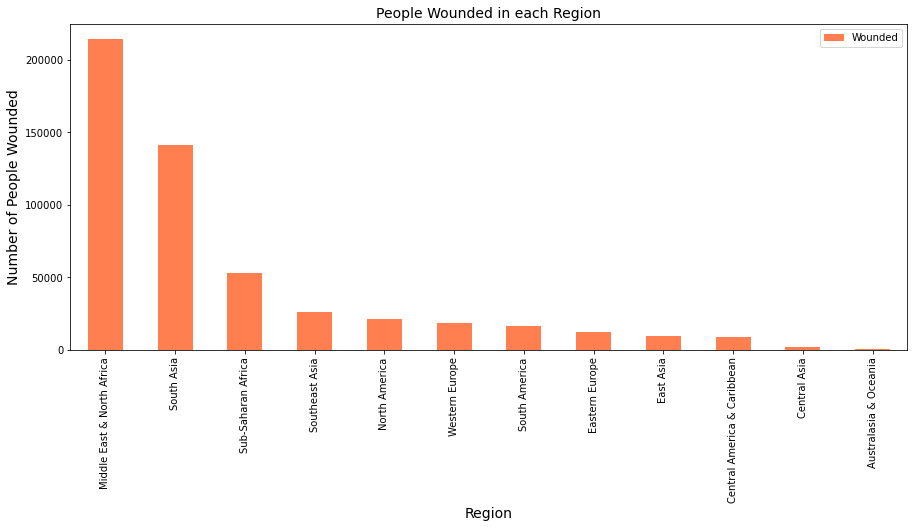

In [376]:
#Killed in each Region
rk.plot(kind="bar",color="red",figsize=(15,6))
plt.title("People Killed in each Region",fontsize=14)
plt.xlabel("Region",fontsize=14)
plt.ylabel("Number of People Killed",fontsize=14)

#Wounded in each Region
rw.plot(kind="bar",color="coral",figsize=(15,6))
plt.title("People Wounded in each Region",fontsize=14)
plt.xlabel("Region",fontsize=14)
plt.ylabel("Number of People Wounded",fontsize=14)

plt.show()

Country wise Attacks (Top 10)

In [377]:
#Number of Attacks in each Country
ct=data["Country"].value_counts().head(10)
ct

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

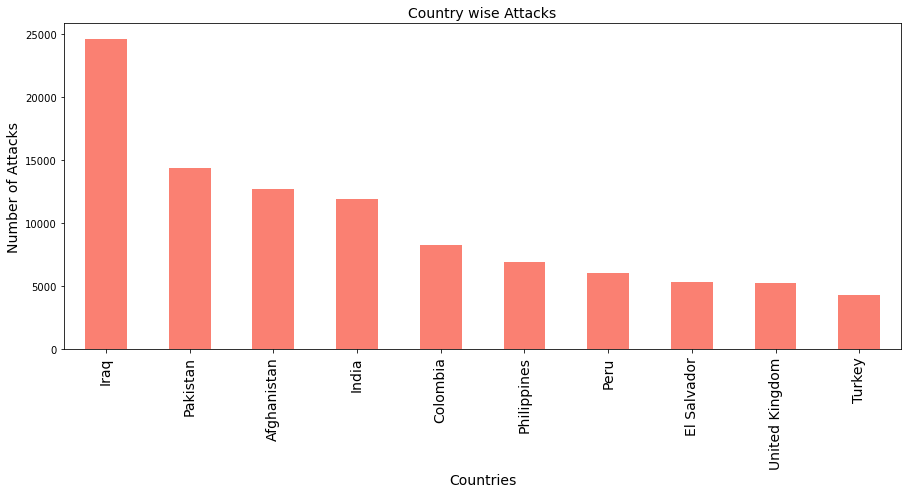

In [378]:
ct.plot(kind="bar",color="salmon",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=14)
plt.xlabel("Countries",fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Number of Attacks",fontsize=14)
plt.show()

In [379]:
#Total Casualties (Killed + Wounded) in each Country
cc=data[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False).head(10)
cc

,Casualty
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


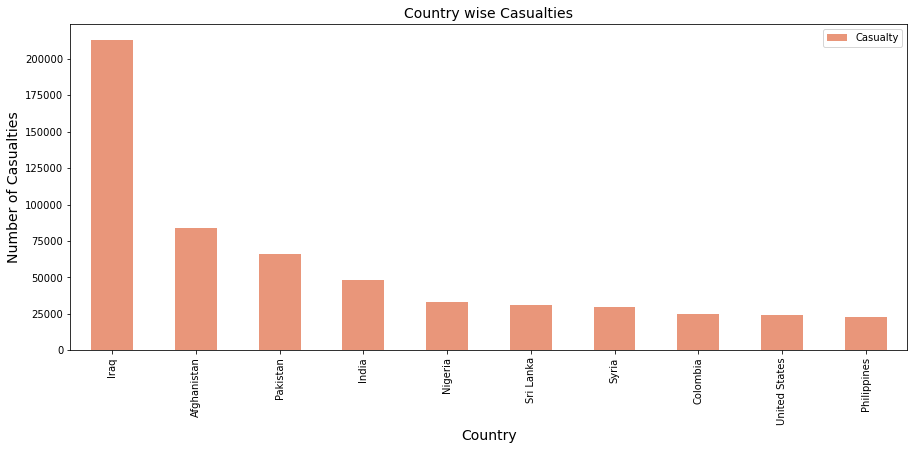

In [380]:
cc.plot(kind="bar",color="darksalmon",figsize=(15,6))
plt.title("Country wise Casualties",fontsize=14)
plt.xlabel("Country",fontsize=14)
plt.ylabel("Number of Casualties",fontsize=14)
plt.show()

In [381]:
#Killed in each Country
ck=data[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False).head(10)
ck

,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


In [382]:
#Wounded in each Country
cw=data[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False).head(10)
cw

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


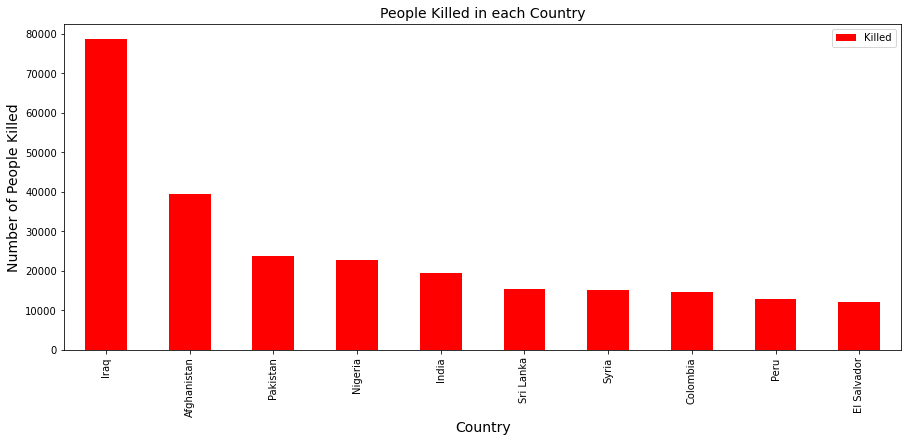

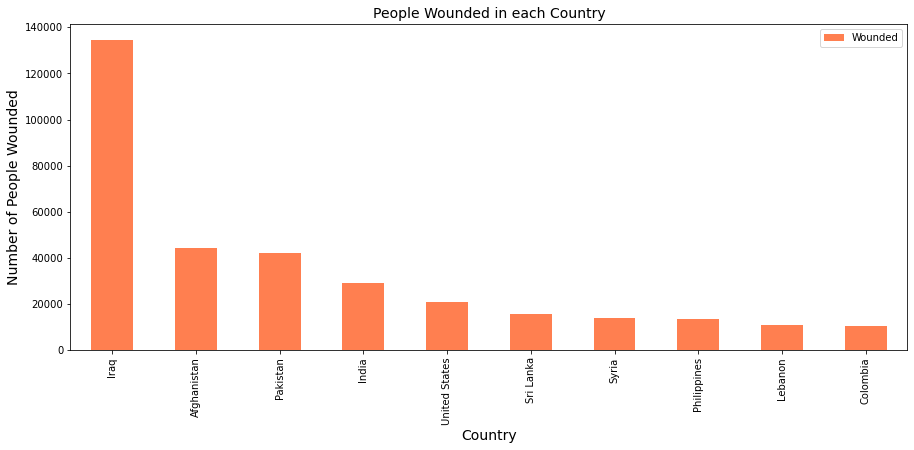

In [383]:
#Killed in each Country
ck.plot(kind="bar",color="red",figsize=(15,6))
plt.title("People Killed in each Country",fontsize=14)
plt.xlabel("Country",fontsize=14)
plt.ylabel("Number of People Killed",fontsize=14)

#Wounded in each Country
cw.plot(kind="bar",color="coral",figsize=(15,6))
plt.title("People Wounded in each Country",fontsize=14)
plt.xlabel("Country",fontsize=14)
plt.ylabel("Number of People Wounded",fontsize=14)

plt.show()

City wise Attacks (Top 10)

In [384]:
#Number of Attacks in each city
city=data["City"].value_counts().drop("Unknown").head(10)
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

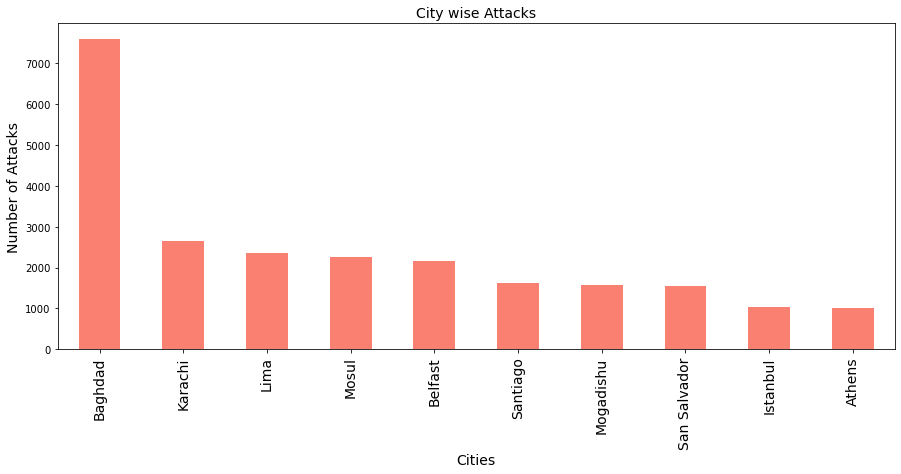

In [385]:
city.plot(kind="bar",color="salmon",figsize=(15,6))
plt.title("City wise Attacks",fontsize=14)
plt.xlabel("Cities",fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Number of Attacks",fontsize=14)
plt.show()

In [386]:
#Total Casualties (Killed + Wounded) in each City
cityc=data[["City","Casualty"]].groupby("City").sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)
cityc

,Casualty
City,
Baghdad,77876.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0
Kabul,8466.0
Beirut,7257.0
Kirkuk,6636.0
Colombo,5906.0


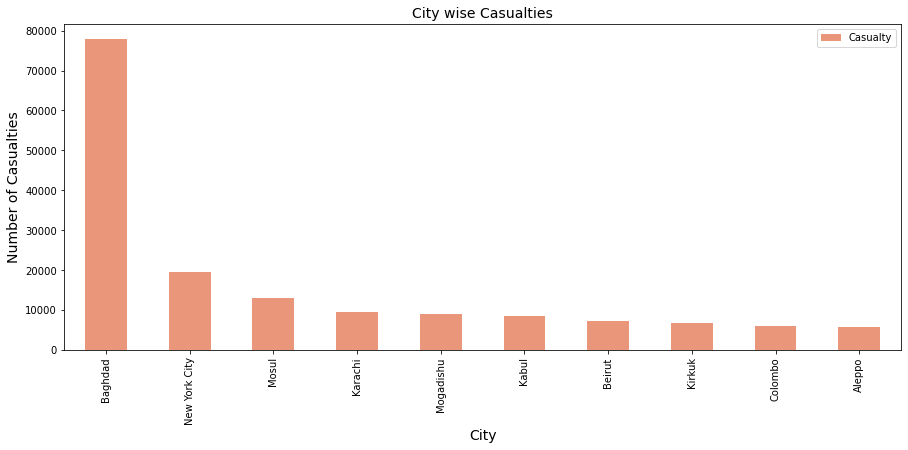

In [387]:
cityc.plot(kind="bar",color="darksalmon",figsize=(15,6))
plt.title("City wise Casualties",fontsize=14)
plt.xlabel("City",fontsize=14)
plt.ylabel("Number of Casualties",fontsize=14)
plt.show()

In [388]:
#Killed in each City
cityk=data[["City","Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)
cityk

,Killed
City,
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0
Tikrit,2679.0
Kabul,2493.0
Ramadi,2313.0
Maiduguri,2235.0


In [389]:
#Wounded in each City
cityw=data[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
cityw

,Wounded
City,
Baghdad,56725.0
New York City,16781.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0
Tokyo,5542.0
Beirut,5341.0
Nairobi,5024.0
Kirkuk,5008.0


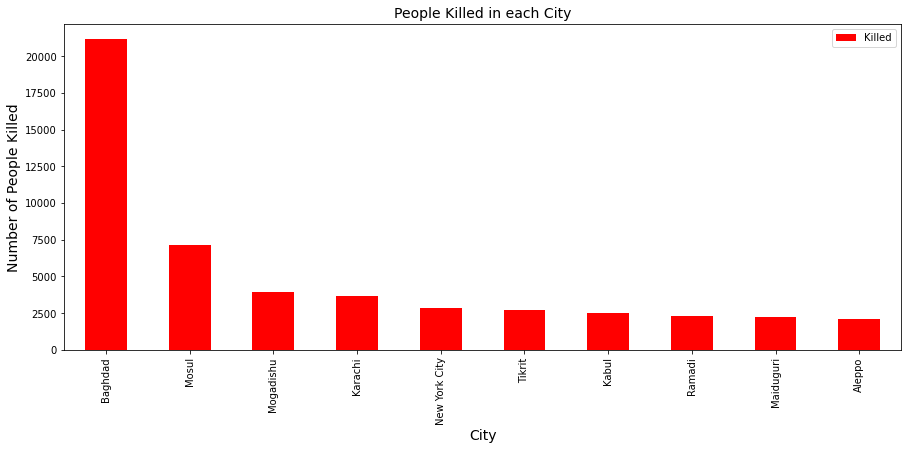

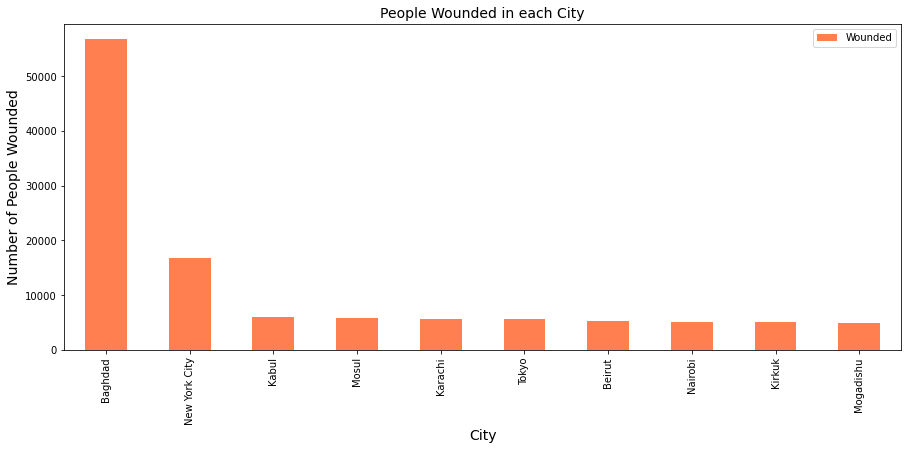

In [390]:
#Killed in each City
cityk.plot(kind="bar",color="red",figsize=(15,6))
plt.title("People Killed in each City",fontsize=14)
plt.xlabel("City",fontsize=14)
plt.ylabel("Number of People Killed",fontsize=14)

#Wounded in each City
cityw.plot(kind="bar",color="coral",figsize=(15,6))
plt.title("People Wounded in each City",fontsize=14)
plt.xlabel("City",fontsize=14)
plt.ylabel("Number of People Wounded",fontsize=14)

plt.show()

Terrorist Group wise Attacks (Top 10)

In [391]:
#Number of Attacks by each Group
grp=data["Group Name"].value_counts().drop("Unknown").head(10)
grp

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group Name, dtype: int64

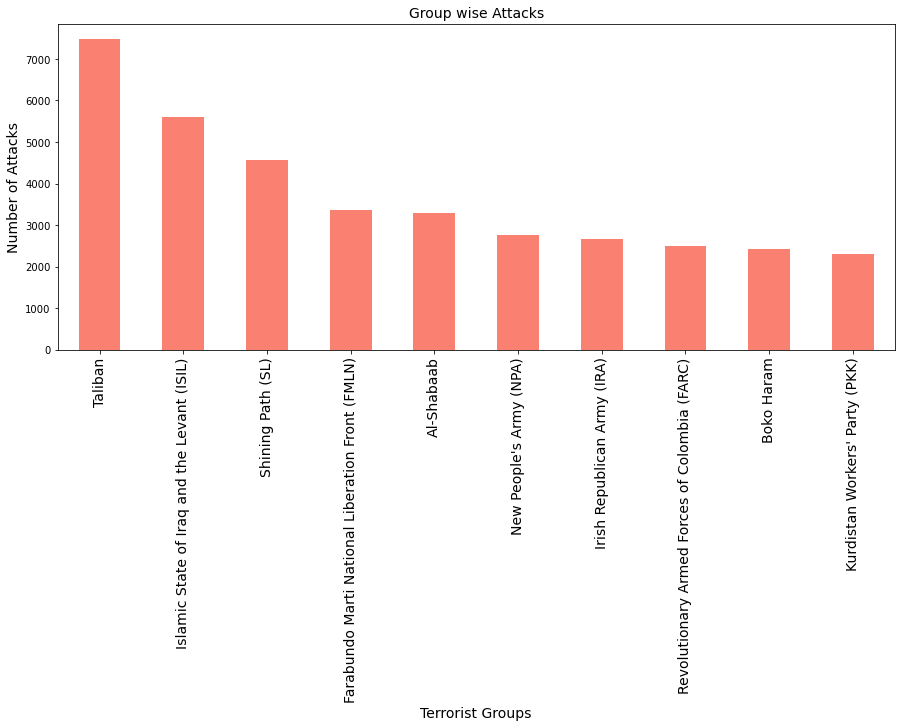

In [392]:
grp.plot(kind="bar",color="salmon",figsize=(15,6))
plt.title("Group wise Attacks",fontsize=14)
plt.xlabel("Terrorist Groups",fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Number of Attacks",fontsize=14)
plt.show()

In [393]:
#Total Casualties(Killed + Wounded) by each Group
gc=data[["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)
gc

,Casualty
Group Name,
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16954.0
Tehrik-i-Taliban Pakistan (TTP),15574.0
Al-Qaida in Iraq,14724.0
Shining Path (SL),14632.0


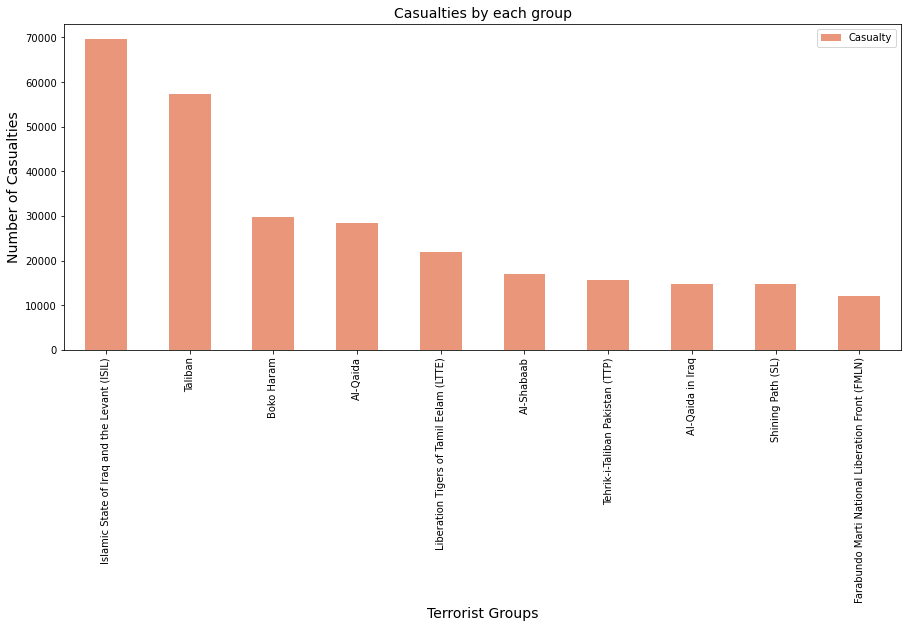

In [394]:
gc.plot(kind="bar",color="darksalmon",figsize=(15,6))
plt.title("Casualties by each group",fontsize=14)
plt.xlabel("Terrorist Groups",fontsize=14)
plt.ylabel("Number of Casualties",fontsize=14)
plt.show()

In [395]:
#Killed and Wounded by each group
gk=data[["Group Name","Killed"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)
gk

,Killed
Group Name,
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0
Tehrik-i-Taliban Pakistan (TTP),6042.0


In [396]:
#Wounded by each group
gw=data[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
gw

,Wounded
Group Name,
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0
Tehrik-i-Taliban Pakistan (TTP),9532.0
Boko Haram,9473.0
Al-Shabaab,7624.0
Aum Shinri Kyo,6003.0


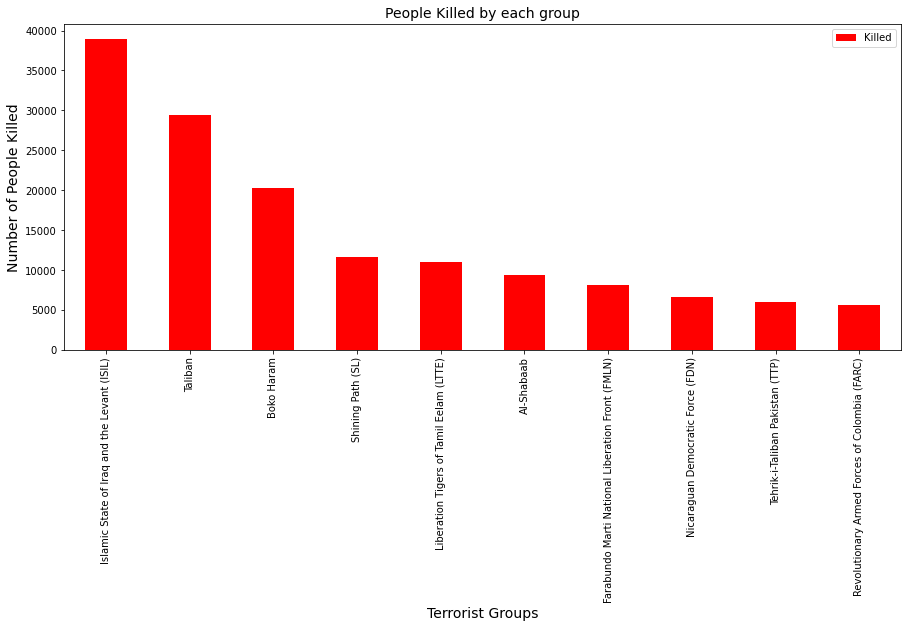

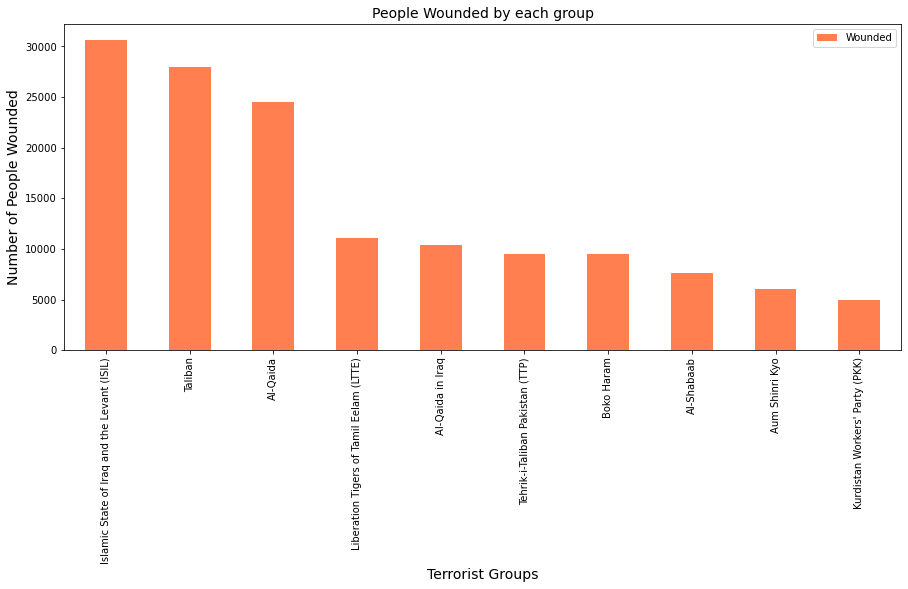

In [397]:
#Killed by each group
gk.plot(kind="bar",color="red",figsize=(15,6))
plt.title("People Killed by each group",fontsize=14)
plt.xlabel("Terrorist Groups",fontsize=14)
plt.ylabel("Number of People Killed",fontsize=14)

#Wounded by each group
gw.plot(kind="bar",color="coral",figsize=(15,6))
plt.title("People Wounded by each group",fontsize=14)
plt.xlabel("Terrorist Groups",fontsize=14)
plt.ylabel("Number of People Wounded",fontsize=14)

plt.show()

Attack Type wise Attacks

In [398]:
#Number of Attacks by each Attack Type
at=data["Attack Type"].value_counts()
at

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack Type, dtype: int64

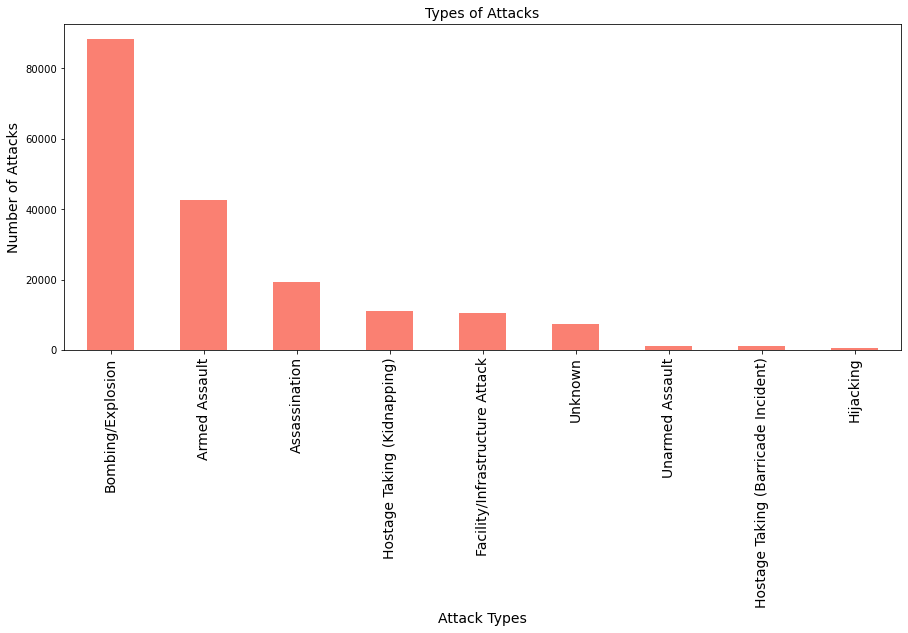

In [399]:
at.plot(kind="bar",color="salmon",figsize=(15,6))
plt.title("Types of Attacks",fontsize=14)
plt.xlabel("Attack Types",fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Number of Attacks",fontsize=14)
plt.show()

In [400]:
#Total Casualties (Killed + Wounded) by each Attack Type
ac=data[["Attack Type","Casualty"]].groupby("Attack Type").sum().sort_values(by="Casualty",ascending=False)
ac

,Casualty
Attack Type,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Unknown,47106.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0
Hijacking,20719.0
Unarmed Assault,14907.0
Hostage Taking (Barricade Incident),8444.0
Facility/Infrastructure Attack,7407.0


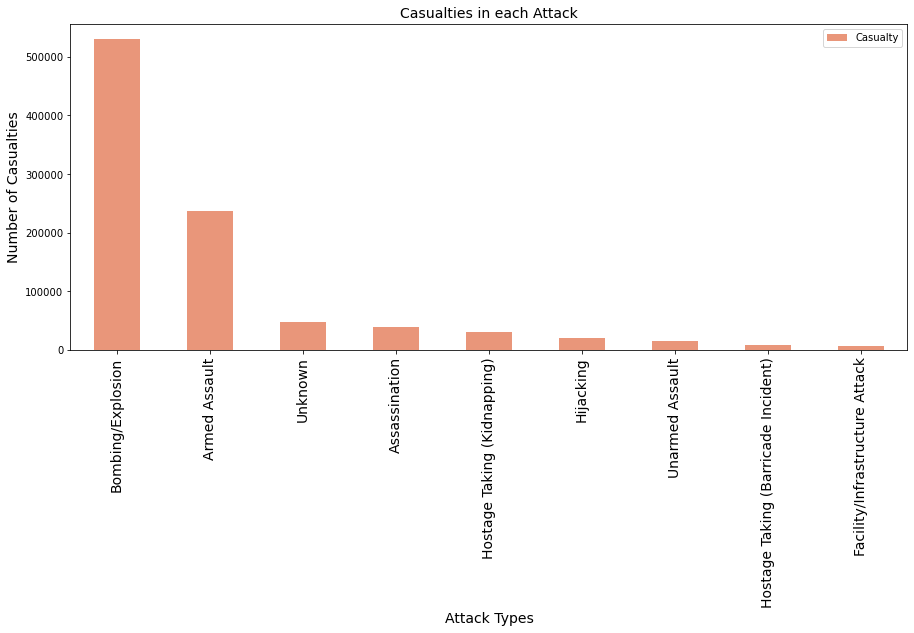

In [401]:
ac.plot(kind="bar",color="darksalmon",figsize=(15,6))
plt.title("Casualties in each Attack",fontsize=14)
plt.xlabel("Attack Types",fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Number of Casualties",fontsize=14)
plt.show()

In [402]:
#Killed and Wounded by each attack type
ak=data[["Attack Type","Killed"]].groupby("Attack Type").sum().sort_values(by="Killed",ascending=False)
ak

,Killed
Attack Type,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


In [403]:
#Wounded by each attack type
aw=data[["Attack Type","Wounded"]].groupby("Attack Type").sum().sort_values(by="Wounded",ascending=False)
aw

,Wounded
Attack Type,
Bombing/Explosion,372686.0
Armed Assault,77366.0
Hijacking,17001.0
Unknown,14725.0
Unarmed Assault,14027.0
Assassination,13887.0
Hostage Taking (Kidnapping),6446.0
Hostage Taking (Barricade Incident),3966.0
Facility/Infrastructure Attack,3765.0


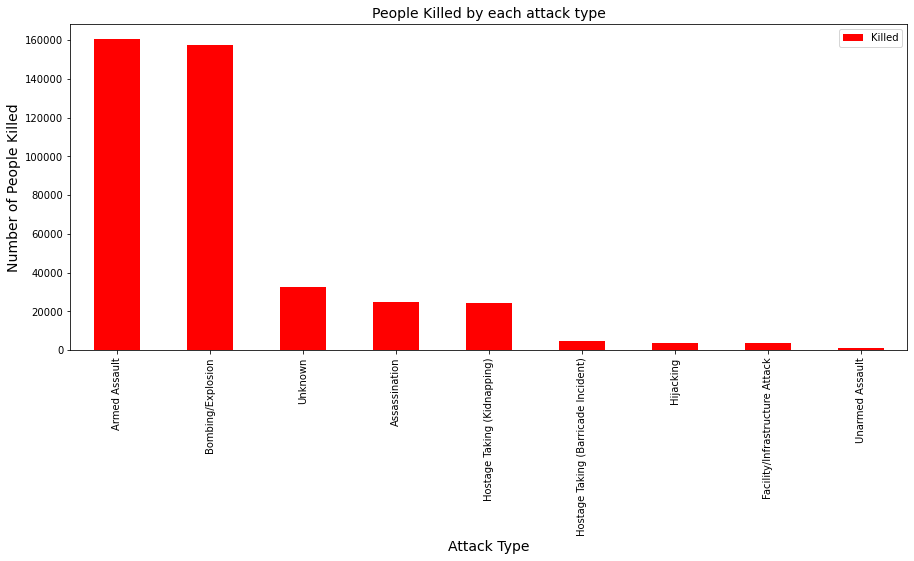

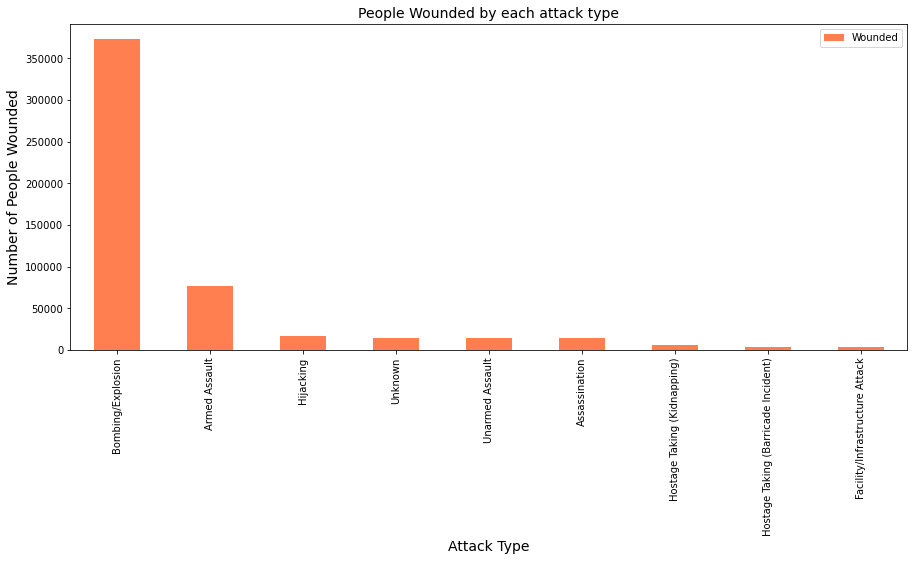

In [404]:
#Killed by each attack type
ak.plot(kind="bar",color="red",figsize=(15,6))
plt.title("People Killed by each attack type",fontsize=14)
plt.xlabel("Attack Type",fontsize=14)
plt.ylabel("Number of People Killed",fontsize=14)

#Wounded by each attack type
aw.plot(kind="bar",color="coral",figsize=(15,6))
plt.title("People Wounded by each attack type",fontsize=14)
plt.xlabel("Attack Type",fontsize=14)
plt.ylabel("Number of People Wounded",fontsize=14)

plt.show()

Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017

In [405]:
#Total Casualties (Killed + Wounded) due to Terrorist Attacks
Casualty=data.loc[:,"Casualty"].sum()
print("Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :\n",Casualty)

Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :
 935737.0


In [406]:
#Killed due to Terrorist Attacks
Killed=data.loc[:,"Killed"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",Killed)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 411868.0


In [407]:
#Wounded due to Terrorist Attacks
Wounded=data.loc[:,"Wounded"].sum()
print("Total number of people wounded due to Terrorist Attacks from 1970 to 2017 across the world :\n",Wounded)

Total number of people wounded due to Terrorist Attacks from 1970 to 2017 across the world :
 523869.0
